In [1]:
import os
from dotenv import load_dotenv
load_dotenv()


True

In [2]:
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")



In [3]:
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY
os.environ['LANGCHAIN_API_KEY']=LANGCHAIN_API_KEY

In [4]:
os.environ['LANGCHAIN_TRACING_V2']="true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

### creating simple tool using  wikipedia

In [5]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wiki_wrapper = WikipediaAPIWrapper()

tool  = WikipediaQueryRun(api_wrapper=wiki_wrapper)

In [6]:
tool.run("python")

/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/langvenv/lib/python3.12/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/langvenv/lib/python3.12/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


'Page: Python (programming language)\nSummary: Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.\nPython is dynamically type-checked and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.\nGuido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language and first released it in 1991 as Python 0.9.0. Python 2.0 was released in 2000. Python 3.0, released in 2008, was a major revision not completely backward-compatible with earlier versions. Python 2.7.18, released in 2020, was the last release of Python 2.\nPython consistently ranks as one of the most popular programming languages, and has gained widespread use in the machine learning community.\

In [7]:
print(tool.description)

A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.


In [8]:
tool.args

{'query': {'description': 'query to look up on wikipedia',
  'title': 'Query',
  'type': 'string'}}

In [9]:
tool.return_direct

False

In [10]:
print(tool.run("what is langchain"))

Page: Retrieval-augmented generation
Summary: Retrieval-Augmented Generation (RAG) is a technique that grants generative artificial intelligence models information retrieval capabilities. It modifies interactions with a large language model (LLM) so that the model responds to user queries with reference to a specified set of documents, using this information to augment information drawn from its own vast, static training data. This allows LLMs to use domain-specific and/or updated information.  
Use cases include providing chatbot access to internal company data or giving factual information only from an authoritative source.

Page: Prompt injection
Summary: Prompt injection is a family of related computer security exploits carried out by getting a machine learning model which was trained to follow human-given instructions (such as an LLM) to follow instructions provided by a malicious user. This stands in contrast to the intended operation of instruction-following systems, wherein the

In [11]:
from langchain_community.tools import YouTubeSearchTool
# pip install youtube_search

youtube_tool = YouTubeSearchTool()
youtube_tool.name


'youtube_search'

In [12]:
youtube_tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [13]:
youtube_tool.run("campusx")

"['https://www.youtube.com/watch?v=XIcfwJUlXd0&pp=ygUHY2FtcHVzeA%3D%3D', 'https://www.youtube.com/watch?v=f9Aje_cN_CY&pp=ygUHY2FtcHVzeA%3D%3D']"

In [14]:
from langchain_community.tools import TavilySearchResults

tavily_search_tool = TavilySearchResults()
tavily_search_tool.run("how are you")

[{'url': 'https://status.net/articles/examples-how-to-answer-how-are-you/',
  'content': '30 Great Examples: How To Answer “How Are You?” “How are you doing?” “How have you been?” How To Answer “How Are You?” When someone asks “How are you?”, you can respond in various ways depending on your mood and situation. “I’m great, thanks for asking!” “I’m doing well, how about you?” “I’m fine, thanks.” “I’m having a rough day.” “I’m feeling a bit down.” Your response to “How are you?” can change based on who you’re talking to and where you are. “I’m doing well, thank you.” “I’m fine, thanks for asking.” “I’m having a good day so far.” “I’m doing great, how about you?” “I’m good, thanks!” How have you been?” A quick “I’m doing well, thanks!” is often enough.'},
 {'url': 'https://www.broadlearners.com/t/10-different-ways-to-say-how-are-you-in-english/1522',
  'content': "Asking someone how they are is a common greeting in English, but there are many different ways to ask this question. This is a

In [15]:
tavily_search_tool.invoke("how are you")

[{'url': 'https://www.broadlearners.com/t/10-different-ways-to-say-how-are-you-in-english/1522',
  'content': "Asking someone how they are is a common greeting in English, but there are many different ways to ask this question. This is a casual and friendly way to ask someone how they are. Person A: How are you doing? Person B: I'm doing well, thanks for asking. This is another casual and common way to ask about someone's well-being. Person A: Hey, how's it going? Person A: How are things? Person B: Things are going well. Person B: Not much, just enjoying my day. Person A: How's everything? Person B: Everything is going well. Person A: Hi, how's your day going? Person B: It's been busy, but good overall. Person A: Hey, what's new? Person B: Life's been good to me lately."},
 {'url': 'https://eslforums.com/how-are-you/',
  'content': 'However, you can also use the question as a simple greeting and move on to a different topic of conversation.\nWays to Ask “How are you?”\nTo ask “how are

In [ ]:
# creating custum tool 
from langchain_community.tools import tool


@tool
def get_summation():
    """
    this tool  is used for addition or add two numbers
    this tool is used for sum or summation 


    Args:
        a (int): _description_
        b (int): _description_
    """
    a = input("Enter the value of A")
    b = input("Enter the value of B")
    return a+b

get_summation.invoke("add two number")

'1212'

In [17]:
from langchain_community.tools import tool

@tool
def get_summation(dict = None) -> int:
    """
    This tool prompts the user to enter two numbers and returns their sum.

    Args:
        input (dict, optional): Not used but required for compatibility.

    Returns:
        int: The sum of the two numbers entered by the user.
    """
    try:
        # Prompt the user for inputs
        a = int(input("Enter the value of A: "))
        b = int(input("Enter the value of B: "))
        return a + b
    except ValueError:
        return "Invalid input. Please enter valid integers."

# Example usage
result = get_summation.invoke({})
print("The result is:", result)


/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/langvenv/lib/python3.12/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "dict" in "GetSummation" shadows an attribute in parent "ValidatedFunction.create_model.<locals>.DecoratorBaseModel"
  warnings.warn(
/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/langvenv/lib/python3.12/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "dict" in "get_summation" shadows an attribute in parent "BaseModel"
  warnings.warn(


The result is: 24


# What is Agent
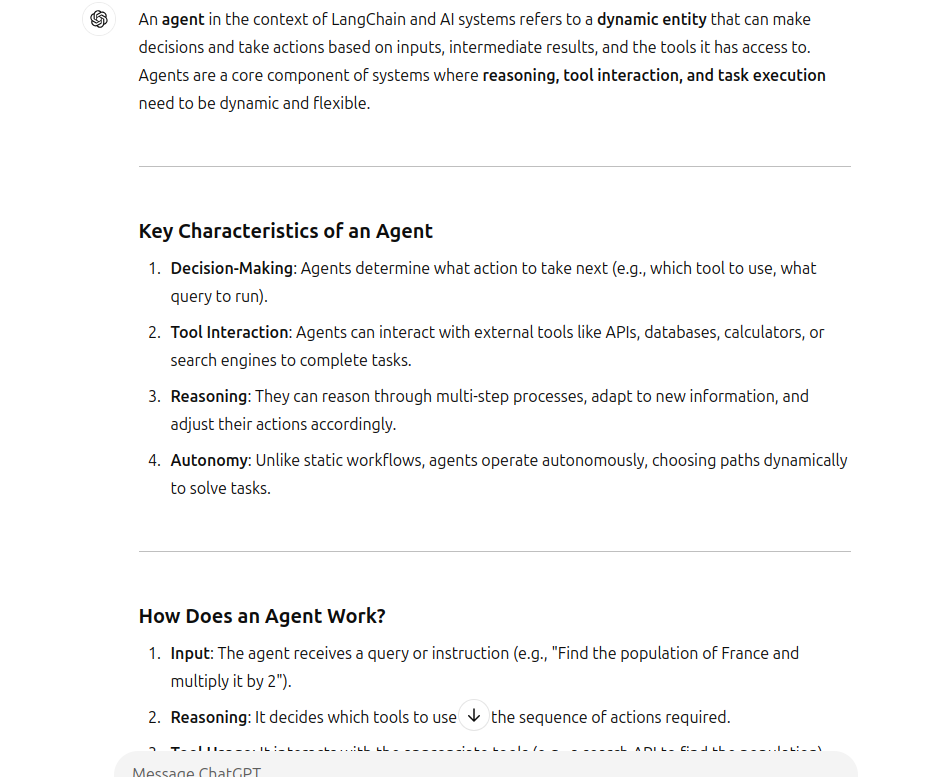

In [18]:
from langchain_google_genai  import GoogleGenerativeAI,\
GoogleGenerativeAIEmbeddings

from langchain_google_genai import ChatGoogleGenerativeAI


llm = ChatGoogleGenerativeAI(model='gemini-1.0-pro')

/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/langvenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
llm.invoke("Generate simple nature image")

AIMessage(content="```\n                              .-~~\\\n                   .--~ __..-~      `.\n                 .~  /__/    \\__      `.\n                 |  /   \\        `.    `.\n        .---.    | |     \\        `.   `.\n       /     \\    \\ \\      \\        `.  `.\n      /       `\\    \\       `\\       `. `.\n     /          `\\    `\\        `\\      `. \\\n    /            `\\     `._______.-'  _..  `\\\n   /              `\\     /   \\      .' `-.`.  \\\n  /                 `.  /     )    /   \\  `. `.\n /                   `.|     /    /   /  `.  `.\n|                     `.'     `-.-'   /    `-.`.\n|                     .'       `    /     \\  `.\n|                    /        .---'      \\   `.\n|                   /        /           \\    `.\n \\                 /        /            \\     `.\n  `.             /        /              `.    `.\n    `._________.-'        /                `.   `.\n      `---..........____.-'                  `.  `.\n          `-

In [55]:
from langchain_huggingface import HuggingFaceEmbeddings
huggingface_embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

from langchain_google_genai import GoogleGenerativeAIEmbeddings


In [21]:
from langchain_groq import ChatGroq


llm  =ChatGroq(model="Gemma2-9b-It")# it is google gema familiy model

In [22]:
llm.run("What is Gemma2-9b-It")

AttributeError: 'ChatGroq' object has no attribute 'run'

In [23]:
llm.invoke("What is Gemma2-9b-It")


AIMessage(content='Gemma2-9B-It is an open-weights AI assistant developed by the Gemma team. \n\nHere\'s a breakdown of what that name means:\n\n* **Gemma2:** This indicates it\'s the second generation of the Gemma model family.\n* **9B:**  Refers to the model\'s size, which is 9 billion parameters.  The number of parameters is a measure of a language model\'s complexity and capacity to learn.\n* **It:**  Stands for "Italian," signifying that this specific model is trained to understand and generate text in the Italian language.\n\n\n**Key Features:**\n\n* **Open-Weights:** The model\'s weights are publicly accessible, meaning anyone can download, study, and modify it. This promotes transparency, collaboration, and innovation within the AI community.\n* **Multilingual:** While trained primarily in Italian, Gemma2 models are generally designed to have some degree of multilingual capability.\n\n* **Text Generation:**  Like other large language models, Gemma2-9B-It can be used for a varie

# This Agent class from the first version of LangChain

In [24]:
from langchain.agents import AgentType
from langchain.agents import load_tools
from langchain.agents import initialize_agent



tool = load_tools(['wikipedia'],llm=llm)  # this call is depreciated from new insted of that we have seperate wrapper for this

agent = initialize_agent(tools=tool,llm=llm,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)


/tmp/ipykernel_7390/695656016.py:9: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(tools=tool,llm=llm,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)


In [25]:
agent.run("What is current GDP of India")

/tmp/ipykernel_7390/2435368785.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  agent.run("What is current GDP of India")




> Entering new AgentExecutor chain...
Thought: I need to look up India's GDP on Wikipedia. 
Action: wikipedia
Action Input: GDP of India
Observation: Page: Economy of India
Summary: The economy of India is a developing mixed economy with a notable public sector in strategic sectors. It is the world's fifth-largest economy by nominal GDP and the third-largest by purchasing power parity (PPP); on a per capita income basis, India ranked 141th by GDP (nominal) and 125th by GDP (PPP). From independence in 1947 until 1991, successive governments followed the Soviet model and promoted protectionist economic policies, with extensive Sovietization, state intervention, demand-side economics, natural resources, bureaucrat-driven enterprises and economic regulation. This is characterised as dirigism, in the form of the Licence Raj. The end of the Cold War and an acute balance of payments crisis in 1991 led to the adoption of a broad economic liberalisation in India and indicative planning. India

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `Thought: I need to look up India's GDP on Wikipedia. 

Thought: I need to look up India's GDP on Wikipedia. 
Action: wikipedia`
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 

## Let's Understand the working of Agents
## Showcase the image and Explain the basic flow of Agent
## Now Built the Agent from the LangChain Version itself but this time we will use the Predefine Classes for the different type of Agents

In [27]:
from langchain_community.tools.tavily_search import TavilySearchResults

search_tool = TavilySearchResults()
search_tool.invoke("what is weather in Ernakulam for today")

[{'url': 'https://www.weatherapi.com/',
  'content': "{'location': {'name': 'Ernakulam', 'region': 'Kerala', 'country': 'India', 'lat': 9.9833, 'lon': 76.2833, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1737523679, 'localtime': '2025-01-22 10:57'}, 'current': {'last_updated_epoch': 1737522900, 'last_updated': '2025-01-22 10:45', 'temp_c': 30.2, 'temp_f': 86.4, 'is_day': 1, 'condition': {'text': 'Mist', 'icon': '//cdn.weatherapi.com/weather/64x64/day/143.png', 'code': 1030}, 'wind_mph': 2.2, 'wind_kph': 3.6, 'wind_degree': 335, 'wind_dir': 'NNW', 'pressure_mb': 1011.0, 'pressure_in': 29.85, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 49, 'cloud': 25, 'feelslike_c': 32.8, 'feelslike_f': 91.0, 'windchill_c': 28.7, 'windchill_f': 83.6, 'heatindex_c': 30.3, 'heatindex_f': 86.5, 'dewpoint_c': 19.1, 'dewpoint_f': 66.4, 'vis_km': 5.0, 'vis_miles': 3.0, 'uv': 6.7, 'gust_mph': 2.6, 'gust_kph': 4.1}}"},
 {'url': 'https://www.holiday-weather.com/ernakulam/forecast/',
  'content': 'Weather in 

In [31]:
# CONVERT INTO TOOL

tools  = [search_tool]


# get the prompt

from langchain import hub

prompt = hub.pull("hwchase17/openai-functions-agent")

In [32]:
prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='

In [33]:
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

### agent_scratchpad:
The agent does not call a tool just once to get the desired answer, but has a structure that calls tools repeatedly until the desired answer is obtained. Each time you call a tool, what the previous call was like, information about the previous call, and the result are stored in this field.

In [36]:
from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(llm=llm,tools=tools,prompt=prompt)

In [37]:
from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(agent=agent,tools=tools,verbose=True)

In [39]:
agent_executor.invoke({"input":"hellow how are you"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'how are you'}`


[{'url': 'https://www.fluentu.com/blog/english/how-are-you-esl/', 'content': 'Say “hello” to as many people as you can and see how they answer your “How are you?”\nOnce you’ve mastered this question, you might be so happy that you answer\n“perfect”\nto the next person who asks how you are!\nDownload:\n This can be paired with “same old” like this:\n“How are you doing?”\n“Oh, you know… same old”\nI’ve been better\nWhen there is something wrong, you can use “I’ve been better” as your first response.\n The difference between “How are you?” and “How are you doing?”\nThese phrases are very similar, but “how are you?” is slightly more formal, and may be used more commonly when someone is specifically asking about your health or wellbeing.\n Let’s look at some formal (more polite) answers to “How are you?”\nYou will use these answers when you’re talking to\nacquaintances\nand\nstr

{'input': 'hellow how are you',
 'output': 'I am doing well, thank you. How are you? \n'}

In [40]:
agent_executor.invoke({"input":"what is weather in Ernakulam for today"})




> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in Ernakulam today'}`


[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'Ernakulam', 'region': 'Kerala', 'country': 'India', 'lat': 9.9833, 'lon': 76.2833, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1737524292, 'localtime': '2025-01-22 11:08'}, 'current': {'last_updated_epoch': 1737523800, 'last_updated': '2025-01-22 11:00', 'temp_c': 30.2, 'temp_f': 86.4, 'is_day': 1, 'condition': {'text': 'Mist', 'icon': '//cdn.weatherapi.com/weather/64x64/day/143.png', 'code': 1030}, 'wind_mph': 5.1, 'wind_kph': 8.3, 'wind_degree': 265, 'wind_dir': 'W', 'pressure_mb': 1011.0, 'pressure_in': 29.85, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 49, 'cloud': 25, 'feelslike_c': 33.1, 'feelslike_f': 91.5, 'windchill_c': 28.8, 'windchill_f': 83.9, 'heatindex_c': 30.7, 'heatindex_f': 87.2, 'dewpoint_c': 19.7, 'dewpoint_f': 67.4, 'vis_km': 5.0, 'vis_miles': 3.0, 'uv': 9.0, 'g

{'input': 'what is weather in Ernakulam for today',
 'output': 'The weather in Ernakulam today is 30.2°C and misty. \n'}

In [42]:
# adding one more tool
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter


In [43]:
loader = WebBaseLoader("https://www.brainwired.in/")

In [45]:
docs = loader.load()

In [48]:
docs

[Document(metadata={'source': 'https://www.brainwired.in/', 'title': 'BrainWired | WeStock ( Enhancing Livestock productivity )', 'description': 'Brainwired is an agritech startup based out of India, which has developed a livestock health monitoring, and tracking system named WeSTOCK, that uses an IoT ear tag and a unique ML algorithm to identify sick and pregnant livestock and alert farmers accordingly.', 'language': 'en'}, page_content="BrainWired | WeStock ( Enhancing Livestock productivity )BrainwiredBrainwired is an agritech startup based out of India, which has developed a livestock health monitoring, and tracking system named WeSTOCK. Our motive is to empower the lifestyle of all livestock farmers with high end technology at an affordable rate. Our team has a passion for making things with real value. This has led us to assemble a multi-talented group that can do just about anything. We believe in creating a brand through strategy, story-telling, products, and integrated experie

In [47]:
# perform the split of data

for doc  in docs:
    print(doc)

page_content='BrainWired | WeStock ( Enhancing Livestock productivity )BrainwiredBrainwired is an agritech startup based out of India, which has developed a livestock health monitoring, and tracking system named WeSTOCK. Our motive is to empower the lifestyle of all livestock farmers with high end technology at an affordable rate. Our team has a passion for making things with real value. This has led us to assemble a multi-talented group that can do just about anything. We believe in creating a brand through strategy, story-telling, products, and integrated experiences on web, mobile, and in the world. So that we become a household name among Indian farmers becoming a symbol of trust and qualityShark tankIndiaFounders “bagged the deal” with the sharks, See the episode of shark tank season 1WeStockexplainerSimple way to understand how our solution helps youInterviewVideoHear from our experts.Awards and RecognitionWe have thebest partners         We'd love to hear  from you    Fill up th

In [53]:
# document spliting

documents = RecursiveCharacterTextSplitter(
    chunk_size=500,chunk_overlap = 100
).split_documents(docs)

In [54]:
documents

[Document(metadata={'source': 'https://www.brainwired.in/', 'title': 'BrainWired | WeStock ( Enhancing Livestock productivity )', 'description': 'Brainwired is an agritech startup based out of India, which has developed a livestock health monitoring, and tracking system named WeSTOCK, that uses an IoT ear tag and a unique ML algorithm to identify sick and pregnant livestock and alert farmers accordingly.', 'language': 'en'}, page_content='BrainWired | WeStock ( Enhancing Livestock productivity )BrainwiredBrainwired is an agritech startup based out of India, which has developed a livestock health monitoring, and tracking system named WeSTOCK. Our motive is to empower the lifestyle of all livestock farmers with high end technology at an affordable rate. Our team has a passion for making things with real value. This has led us to assemble a multi-talented group that can do just about anything. We believe in creating a brand through'),
 Document(metadata={'source': 'https://www.brainwired.

In [56]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
gemini_embedding = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [57]:
# perform the embedding
vector = FAISS.from_documents(documents=documents,embedding=gemini_embedding)

In [58]:
vector

In [60]:
retriever = vector.as_retriever()

In [62]:
retriever.invoke("what is westock")

[Document(id='993020ab-6181-419b-856f-de531b9e436b', metadata={'source': 'https://www.brainwired.in/', 'title': 'BrainWired | WeStock ( Enhancing Livestock productivity )', 'description': 'Brainwired is an agritech startup based out of India, which has developed a livestock health monitoring, and tracking system named WeSTOCK, that uses an IoT ear tag and a unique ML algorithm to identify sick and pregnant livestock and alert farmers accordingly.', 'language': 'en'}, page_content='a multi-talented group that can do just about anything. We believe in creating a brand through strategy, story-telling, products, and integrated experiences on web, mobile, and in the world. So that we become a household name among Indian farmers becoming a symbol of trust and qualityShark tankIndiaFounders “bagged the deal” with the sharks, See the episode of shark tank season 1WeStockexplainerSimple way to understand how our solution helps youInterviewVideoHear from our experts.Awards and'),
 Document(id='0

In [65]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(retriever,
                      "brainwired",
                      'Search information aboout the brainwired')

tools = [search_tool, retriever_tool]
from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(llm=llm,tools=tools,prompt=prompt)

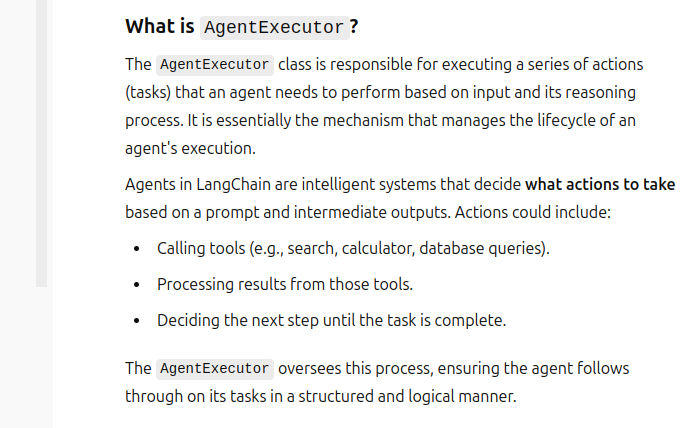

In [67]:
agent_excutor = AgentExecutor(agent=agent,tools=tools,verbose=True)

In [68]:
agent_excutor.invoke({"input":"hi what is a langsmith"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'what is a langsmith'}`


[{'url': 'https://www.geeksforgeeks.org/introduction-to-langsmith/', 'content': 'Langsmith is an innovative framework designed to enhance and streamline the development of natural language processing (NLP) applications. It builds upon LangChain, a popular library for chaining multiple language models together, to create sophisticated and flexible NLP workflows. Langsmith provides tools for managing, deploying, and scaling'}, {'url': 'https://www.langchain.ca/blog/what-is-langsmith/', 'content': 'Langsmith is an application framework for language models equipped with LLM tools and agent support. It focuses on addressing challenges faced during language model development for production. This guide offers an in-depth look into the essential features and functionalities of Langsmith. Understanding Langsmith vs Langchain Prior to exploring Langsmith, it'}, {'url': 'https

{'input': 'hi what is a langsmith',
 'output': 'Langsmith is a framework designed to improve the development of natural language processing (NLP) applications. It builds upon LangChain and focuses on tools for managing, deploying, and scaling NLP workflows.  Langsmith helps with debugging by logging all calls to language models, chains, agents, tools, and retrievers. It provides a unified platform for tracing, evaluating, and debugging complex agent prompt chains.  \n\nLangsmith is often used in conjunction with LangChain, where LangChain is used to build the initial pipeline and LangSmith is used to monitor and debug the pipeline. \n\n\n'}

In [69]:
agent_excutor.invoke({"input":"whos is founder of brainwired"})



> Entering new AgentExecutor chain...

Invoking: `brainwired` with `{'query': 'What is brainwired?'}`
responded: ```json


BrainWired | WeStock ( Enhancing Livestock productivity )BrainwiredBrainwired is an agritech startup based out of India, which has developed a livestock health monitoring, and tracking system named WeSTOCK. Our motive is to empower the lifestyle of all livestock farmers with high end technology at an affordable rate. Our team has a passion for making things with real value. This has led us to assemble a multi-talented group that can do just about anything. We believe in creating a brand through

way to understand how our solution helps youInterviewVideoHear from our experts.Awards and RecognitionWe have thebest partners         We'd love to hear  from you    Fill up the form and our team will get back to you as soon as possible   info@brainwired.in   +91 9995985324   WORKING HOURSMon - Fri 9:30 - 18:00CONTACT USinfo@brainwired.inPRODUCTSwestock (Cow) PetsINFORMAT

{'input': 'whos is founder of brainwired',
 'output': 'BrainWired is an agritech startup based in India that has developed a livestock health monitoring and tracking system called WeSTOCK. \n'}

In [70]:
agent_excutor.invoke({"input":"what they do"})



> Entering new AgentExecutor chain...
Please provide me with a question so I can assist you.  


> Finished chain.


{'input': 'what they do',
 'output': 'Please provide me with a question so I can assist you.  \n'}

In [71]:
# above response their is no chat history is maintained

from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

In [72]:
ChatMessageHistory

langchain_core.chat_history.InMemoryChatMessageHistory

In [73]:
RunnableWithMessageHistory

langchain_core.runnables.history.RunnableWithMessageHistory

In [74]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory


In [75]:
message_history  = ChatMessageHistory()

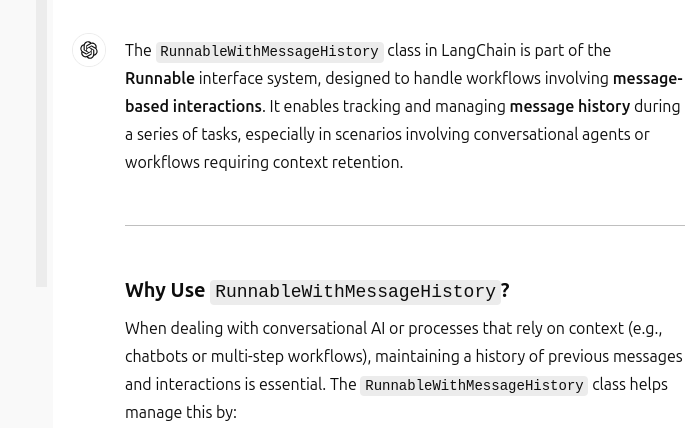

In [82]:
agent_with_chat_history = RunnableWithMessageHistory(
    agent_excutor,
    lambda session_id:message_history,
    input_messages_key="input",
    history_messages_key="chat_history"
    )

In [84]:
agent_with_chat_history.invoke({"input":"whos is founder of brainwired"},
                               config={"configurable":{'session_id':1}},
                               )



> Entering new AgentExecutor chain...
</tool-use>

> Finished chain.


{'input': 'whos is founder of brainwired',
 'chat_history': [],
 'output': '</tool-use>'}

In [85]:
agent_with_chat_history.invoke({"input":"whos is founder of brainwired"},
                               config={"configurable":{'session_id':1}},
                               )



> Entering new AgentExecutor chain...

Invoking: `brainwired` with `{'query': 'founder'}`


a multi-talented group that can do just about anything. We believe in creating a brand through strategy, story-telling, products, and integrated experiences on web, mobile, and in the world. So that we become a household name among Indian farmers becoming a symbol of trust and qualityShark tankIndiaFounders “bagged the deal” with the sharks, See the episode of shark tank season 1WeStockexplainerSimple way to understand how our solution helps youInterviewVideoHear from our experts.Awards and

usBlogsCERTIFICATIONSIS0 9001:2015FOLLOW US  Facebook Instagram TwitterLinkedin YouTubePrivacy policyTerms and conditionShipping policy © 2022 Drakon Innovation Pvt Ltd

BrainWired | WeStock ( Enhancing Livestock productivity )BrainwiredBrainwired is an agritech startup based out of India, which has developed a livestock health monitoring, and tracking system named WeSTOCK. Our motive is to empower the lif

{'input': 'whos is founder of brainwired',
 'chat_history': [HumanMessage(content='whos is founder of brainwired', additional_kwargs={}, response_metadata={}),
  AIMessage(content='</tool-use>', additional_kwargs={}, response_metadata={})],
 'output': 'The founder of Brainwired is not explicitly mentioned in the provided text. \n\n\n'}

In [86]:
agent_with_chat_history.invoke({"input":"what is machine learning"},
                               config={"configurable":{'session_id':1}},
                               )



> Entering new AgentExecutor chain...
Machine learning is a type of artificial intelligence (AI) that allows computer systems to learn from data without being explicitly programmed. 

Imagine you want to teach a computer to identify cats in pictures. Instead of giving it a set of rules like "look for pointy ears and whiskers," you show it thousands of pictures of cats and dogs. The computer analyzes these pictures, identifying patterns and features that distinguish cats from dogs. Over time, it learns to recognize cats on its own, even if it has never seen that specific cat before.

That's essentially how machine learning works:

* **Data:**  Machine learning algorithms are trained on massive datasets.
* **Algorithms:** These algorithms are like recipes that tell the computer how to learn from the data.
* **Patterns:** The algorithms identify patterns and relationships within the data.
* **Predictions:** Based on the learned patterns, the machine can make predictions about new, unsee

{'input': 'what is machine learning',
 'chat_history': [HumanMessage(content='whos is founder of brainwired', additional_kwargs={}, response_metadata={}),
  AIMessage(content='</tool-use>', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='whos is founder of brainwired', additional_kwargs={}, response_metadata={}),
  AIMessage(content='The founder of Brainwired is not explicitly mentioned in the provided text. \n\n\n', additional_kwargs={}, response_metadata={})],
 'output': 'Machine learning is a type of artificial intelligence (AI) that allows computer systems to learn from data without being explicitly programmed. \n\nImagine you want to teach a computer to identify cats in pictures. Instead of giving it a set of rules like "look for pointy ears and whiskers," you show it thousands of pictures of cats and dogs. The computer analyzes these pictures, identifying patterns and features that distinguish cats from dogs. Over time, it learns to recognize cats on its own,

In [87]:
agent_with_chat_history.invoke({"input":"what was the my first question"},
                               config={"configurable":{'session_id':1}},
                               )



> Entering new AgentExecutor chain...
Your first question was: "whos is founder of brainwired" 




> Finished chain.


{'input': 'what was the my first question',
 'chat_history': [HumanMessage(content='whos is founder of brainwired', additional_kwargs={}, response_metadata={}),
  AIMessage(content='</tool-use>', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='whos is founder of brainwired', additional_kwargs={}, response_metadata={}),
  AIMessage(content='The founder of Brainwired is not explicitly mentioned in the provided text. \n\n\n', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='what is machine learning', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Machine learning is a type of artificial intelligence (AI) that allows computer systems to learn from data without being explicitly programmed. \n\nImagine you want to teach a computer to identify cats in pictures. Instead of giving it a set of rules like "look for pointy ears and whiskers," you show it thousands of pictures of cats and dogs. The computer analyzes these pictures, identif

In [88]:
agent_with_chat_history.invoke({"input":"what was the my second question"},
                               config={"configurable":{'session_id':1}},
                               )



> Entering new AgentExecutor chain...
Your second question was: "what is machine learning" 


> Finished chain.


{'input': 'what was the my second question',
 'chat_history': [HumanMessage(content='whos is founder of brainwired', additional_kwargs={}, response_metadata={}),
  AIMessage(content='</tool-use>', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='whos is founder of brainwired', additional_kwargs={}, response_metadata={}),
  AIMessage(content='The founder of Brainwired is not explicitly mentioned in the provided text. \n\n\n', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='what is machine learning', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Machine learning is a type of artificial intelligence (AI) that allows computer systems to learn from data without being explicitly programmed. \n\nImagine you want to teach a computer to identify cats in pictures. Instead of giving it a set of rules like "look for pointy ears and whiskers," you show it thousands of pictures of cats and dogs. The computer analyzes these pictures, identi

# ReAct Agent

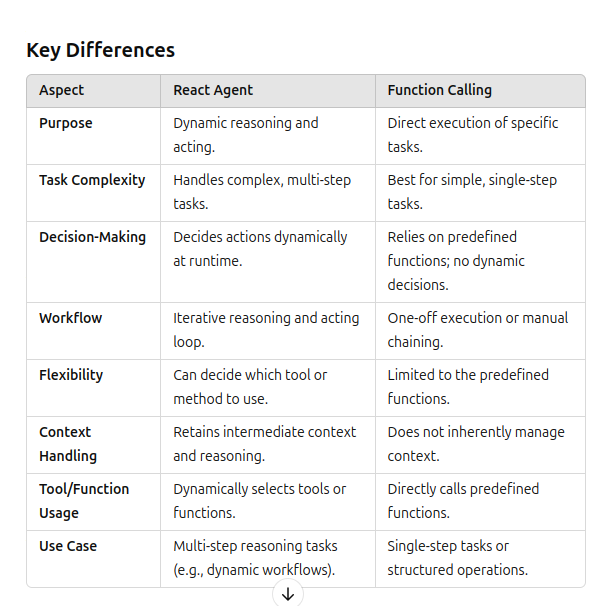

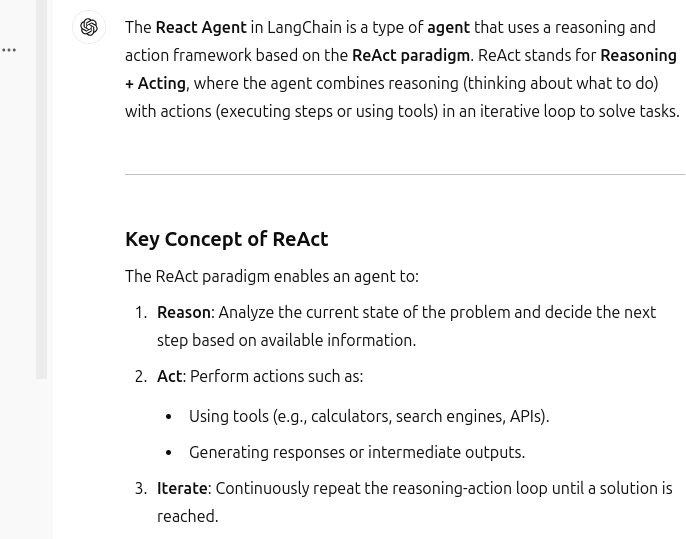

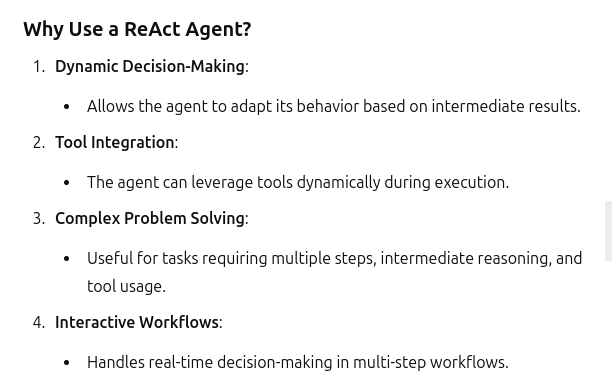

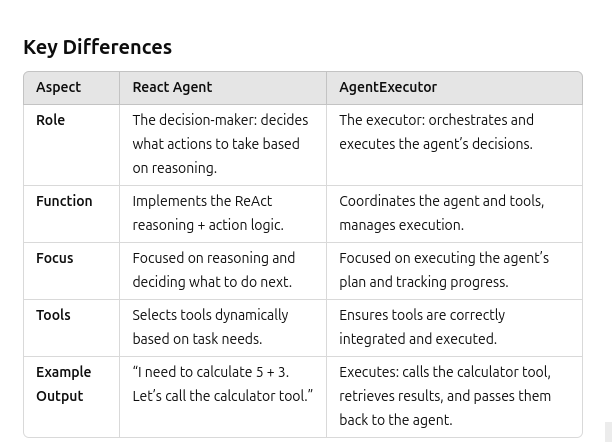
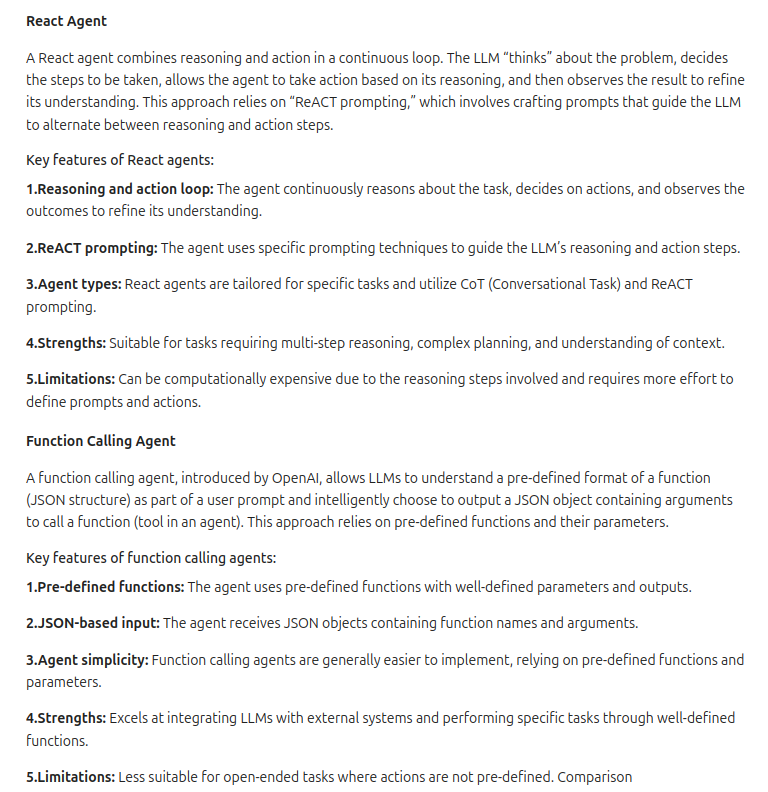

In [ ]:
from langchain.utilities import GoogleSerperAPIWrapper
from langchain.agents import Tool  # this is used to define the tool so that agent can use

from langchain_community.tools import tool # this is used to convert the into tool using function

In [ ]:
# example :

from langchain.agents import Tool

# Define a simple function
def greet(name: str) -> str:
    return f"Hello, {name}!"

# Wrap it in a Tool
greet_tool = Tool(
    name="Greeting Tool",
    func=greet,
    description="Greets the user by name."
)

# The tool is now ready for use in an agent.


In [ ]:
from langchain_community.tools import tool

# Define a tool using the decorator
@tool
def greet(name: str) -> str:
    return f"Hello, {name}!"

# The function is automatically registered as a LangChain tool.


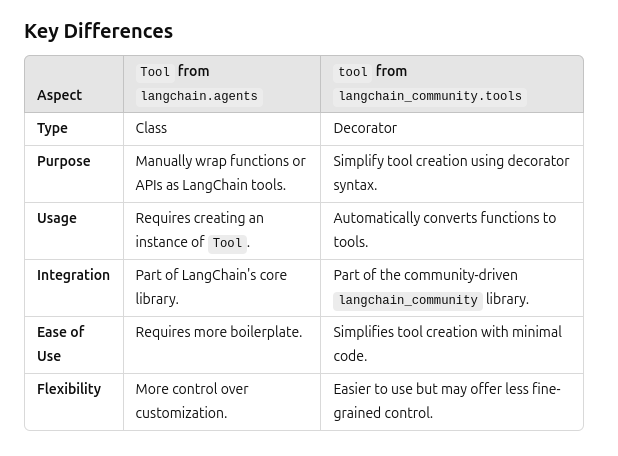